In [1]:
### NLP_Assign_6_Corona_Tweets_Sentiment_Analysis.ipynb

In [2]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [3]:
import string
import re
from collections import Counter
import matplotlib.pyplot as plt

In [4]:
pip install GetOldTweets3

In [5]:
def get_tweets(start_date,end_date,topic):
    import GetOldTweets3 as got   # library used to scrape data from twitter without any other tools
    tweetCriteria = got.manager.TweetCriteria().setQuerySearch(topic) \
        .setSince(start_date) \
        .setUntil(end_date) \
        .setMaxTweets(100)
    # Creation of list that contains all tweets
    tweets = got.manager.TweetManager.getTweets(tweetCriteria)
    # Creating list of chosen tweet data
    text_tweets = [[tweet.text] for tweet in tweets]
    return text_tweets

In [6]:
start_date_befor="2020-02-22"
end_date_befor="2020-03-23"
topic='#coronavirus'
tweets_before  = get_tweets(start_date_befor,end_date_befor,topic)

In [7]:
type(tweets_before)

list

In [8]:
start_date_after="2020-03-24"
end_date_after="2020-04-23"
topic='#coronavirus'
tweets_after  = get_tweets(start_date_after,end_date_after,topic)

In [9]:
tweets_after[2]

['Are you out of work due to #coronavirus? Is your resume ready for when the country opens back up?']

In [10]:
# make a dictionary of Contractions

contraction_mapping={
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

In [11]:
## function to pre-process the text
def cleaner(text):
    newString=re.sub(r"@[a-zA-Z0-9]+","",text)           # removing user mentions
    newString=re.sub("#","",newString) 
    newString=' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")])
    x=re.sub(r'http\S+','',newString)                    # remove URL's
    newString=re.sub(r"'s\b"," is",newString)            # removing 's
    x=re.sub(r'[%#@$&!+|ð¦±]','',newString)             # Remove spacial char
    x=re.sub(r'[!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]','',newString)                   # remove punctuations mark
    newString=re.sub("[^a-zA-Z]"," ",newString)          # fetching out only char
    #lower_case=letters_only.lower()                     # converting everything in lowercase
    words=newString.split()                              # split based on space to remove multiple spaces
    return (" ".join(words)).strip()

In [12]:
# reading text file
text = ""
text_tweets = get_tweets(start_date_befor,end_date_befor,topic)

length = len(text_tweets)

for i in range(0, length):
    text = text_tweets[i][0] + " " + text

# converting to lowercase
lower_case_befor = text.lower()

In [13]:
cleaned_text_before = cleaner(lower_case_befor)
cleaned_text_before

'quanto vorrei uscissero da quelle case e si facessero prendere dalle forze dell ordine per denunciare coronavirus coronavirus treatment trials in new york to begin on tuesday governor cuomo says he is optimistic card tarot readings for phone or facetime to honor the safety amp health of the world during the coronavirus pandemic bohemiantarot bohemian tarot tarotreader tarotreading tarotcards gypsy psychic witch witchcraft wicca quedateencasa coronavirus quedateentuputacasa covid madrid espa a stayathome everyone is saying that we should be consuming lots of fruits and vegetables yet coronavirus lives for days if not weeks on certain surfaces did anyone take into consideration that we may be catching it from the fruits and vegetables sitting out at the markets karantina g nlerim bilmem ka nc g n vaka trilyon teketekbilim covidiot coronavirus sokagacikmaturkiye hayateves ar sakinolchampevdeyim coronaviruspandemic covidiots covid voil c tait il y a tout juste deux mois on peut r crire l 

In [14]:
from nltk.tokenize import word_tokenize
tokenized_words_before =nltk.word_tokenize(cleaned_text_before)

In [15]:
# # reading text file
# text = ""
# text_tweets = get_tweets(start_date_befor,end_date_befor,topic)

# length = len(text_tweets)

# for i in range(0, length):
#     text = text_tweets[i][0] + " " + text

# # converting to lowercase
# lower_case = text.lower()

# # Removing punctuations
# cleaned_text = lower_case.translate(str.maketrans('', '', string.punctuation))

# # splitting text into words
# tokenized_words_before = cleaned_text.split()

In [16]:
# reading text file
text = ""
text_tweets = get_tweets(start_date_after,end_date_after,topic)

length = len(text_tweets)

for i in range(0, length):
    text = text_tweets[i][0] + " " + text

# converting to lowercase
lower_case_after = text.lower()


In [17]:
cleaned_text_after = cleaner(lower_case_after)
cleaned_text_after

'pennsylvania reports new cases and new deaths bringing total confirmed cases there to and total deaths with new cases and new deaths reported today coronavirus covid coronavirusoutbreak sntesalud hoy a os del diadelatierra earthday piensa verde por un planeta azul think green for a blue planet coronavirus covid el m xico fasetres hoynocircula abril amlo snte snteunoauno free telehealth telemedicine healthcare healthtech telemednow healthcareinnovation covid coronavirus stayathome mtc doc boom fauci sweating bullets trump investigating his million obama to develop the coronavirus https youtu be bpwndrgw ki not trump being right coronavirus trump disagrees strongly with georgia s plan to reopen coronavirus coronavirus the uae and pakistan are working to add more flights to repatriate pakistani citizens from the gulf arab state a dubai government source says que loucura isso quando come ou a epidemia do coronav rus eu logo pensei os fumantes est o fritos justamente por se tratar de uma d

In [18]:
tokenized_words_after =nltk.word_tokenize(cleaned_text_after)

In [28]:
stop_words = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't","new"]

In [29]:
# Removing stop words from the tokenized words list
final_words_befor = [word for word in tokenized_words_before if word not in stop_words]
final_words_after = [word for word in tokenized_words_after if word not in stop_words]

In [30]:
# Lemmatize list of words and join
from nltk.stem import WordNetLemmatizer
# Init the Wordnet Lemmatizer
lemmatizer = WordNetLemmatizer()
lemmatized_output_befor = ' '.join([lemmatizer.lemmatize(w) for w in final_words_befor])
print(len(lemmatized_output_befor))  
print(lemmatized_output_befor) 

12482
quanto vorrei uscissero da quelle case e si facessero prendere dalle forze dell ordine per denunciare coronavirus coronavirus treatment trial york begin tuesday governor cuomo say optimistic card tarot reading phone facetime honor safety amp health world coronavirus pandemic bohemiantarot bohemian tarot tarotreader tarotreading tarotcards gypsy psychic witch witchcraft wicca quedateencasa coronavirus quedateentuputacasa covid madrid espa stayathome everyone saying consuming lot fruit vegetable yet coronavirus life day week certain surface anyone take consideration may catching fruit vegetable sitting market karantina g nlerim bilmem ka nc g n vaka trilyon teketekbilim covidiot coronavirus sokagacikmaturkiye hayateves ar sakinolchampevdeyim coronaviruspandemic covidiots covid voil c tait il tout juste deux mois peut r crire l histoire mais ce moment l c tait la recommandation de l oms coronavirus muy interesante buen trabajo de pais para resolver toda la dudas preguntas respuestas

In [31]:
# Lemmatize list of words and join
from nltk.stem import WordNetLemmatizer
# Init the Wordnet Lemmatizer
lemmatizer = WordNetLemmatizer()
lemmatized_output_after = ' '.join([lemmatizer.lemmatize(w) for w in final_words_after])
print(len(lemmatized_output_after))  
print(lemmatized_output_after) 

12464
pennsylvania report case death bringing total confirmed case total death case death reported today coronavirus covid coronavirusoutbreak sntesalud hoy o del diadelatierra earthday piensa verde por un planeta azul think green blue planet coronavirus covid el xico fasetres hoynocircula abril amlo snte snteunoauno free telehealth telemedicine healthcare healthtech telemednow healthcareinnovation covid coronavirus stayathome mtc doc boom fauci sweating bullet trump investigating million obama develop coronavirus http youtu bpwndrgw ki trump right coronavirus trump disagrees strongly georgia plan reopen coronavirus coronavirus uae pakistan working add flight repatriate pakistani citizen gulf arab state dubai government source say que loucura isso quando come ou epidemia coronav ru eu logo pensei o fumantes est fritos justamente por se tratar de uma doen respirat ria agora j se sabe que doen muito mais sist mica e justamente nicotina pode ser um aliado tratamento surpreso gdf pede estu

In [32]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
stem_text_after = ' '.join([stemmer.stem(w) for w in final_words_after])
print(len(stem_text_after))  
print(stem_text_after) 

11648
pennsylvania report case death bring total confirm case total death case death report today coronaviru covid coronavirusoutbreak sntesalud hoy os del diadelatierra earthday piensa verd por un planeta azul think green blue planet coronaviru covid el xico fasetr hoynocircula abril amlo snte snteunoauno free telehealth telemedicin healthcar healthtech telemednow healthcareinnov covid coronaviru stayathom mtc doc boom fauci sweat bullet trump investig million obama develop coronaviru http youtu bpwndrgw ki trump right coronaviru trump disagre strongli georgia plan reopen coronaviru coronaviru uae pakistan work add flight repatri pakistani citizen gulf arab state dubai govern sourc say que loucura isso quando come ou epidemia coronav ru eu logo pensei os fumant est frito justament por se tratar de uma doen respirat ria agora j se sabe que doen muito mai sist mica e justament nicotina pode ser um aliado tratamento surpreso gdf pede estudo para analisar poss vel abertura da escola http 

In [24]:
# Get emotions text
emotion_list = []
with open('/content/drive/My Drive/NLP/emotions_corona.txt') as file:
    for line in file:
        clear_line = line.replace('\n', '').replace(',', '').replace("'", '').strip()
        word, emotion = clear_line.split(':')
        if word in lemmatized_output_befor:
            emotion_list.append(emotion)

w_befor = Counter(emotion_list)
print(w_befor)

Counter({' sad': 4, 'anxiety': 3, ' fearless': 2, ' attracted': 2, ' angry': 2, ' lost': 2, ' bored': 1, ' adequate': 1, ' free': 1, ' happy': 1, ' obsessed': 1, ' alone': 1, 'anxious': 1})


In [25]:
# Get emotions text
emotion_list = []
with open('/content/drive/My Drive/NLP/emotions_corona.txt') as file:
    for line in file:
        clear_line = line.replace('\n', '').replace(',', '').replace("'", '').strip()
        word, emotion = clear_line.split(':')
        if word in lemmatized_output_after:
            emotion_list.append(emotion)

w_after = Counter(emotion_list)
print(w_after)

Counter({' sad': 6, 'anxiety': 4, ' angry': 2, ' esteemed': 1, ' happy': 1, ' fearless': 1, ' attracted': 1, ' free': 1, ' independent': 1, ' powerless': 1})


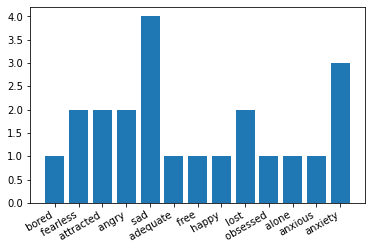

In [26]:
fig, ax1 = plt.subplots()
ax1.bar(w_befor.keys(), w_befor.values())
fig.autofmt_xdate()
#plt.savefig('graph.png')
plt.show()

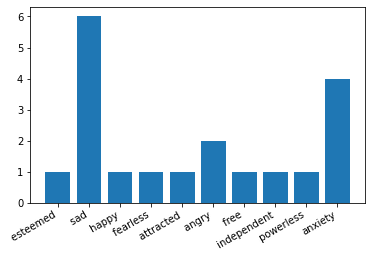

In [27]:
fig, ax1 = plt.subplots()
ax1.bar(w_after.keys(), w_after.values())
fig.autofmt_xdate()
#plt.savefig('graph.png')
plt.show()